# iris

In [1]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [3]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


* eps : 입실론 영역 반경 (일반적으로 1 이하 선택)
* min_samples : 최소 데이터 수 -> 8개 선택
> -1은 이상치

In [8]:
# 클러스터 결과를 담은 df와 사이킷런의 클러스터 객체 등을 인자로 받아 클러스터링 결과를 시각화
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
  if iscenter:
    centers = clusterobj.cluster_centers_

  unique_labels = np.unique(dataframe[label_name].values)
  markers = ['o', 's', '^', 'x', '*']
  isNoise=False

  for label in unique_labels:
    label_cluster = dataframe[dataframe[label_name] == label]
    if label == -1:
      cluster_legend = 'Noise'
      isNoise = True
    else:
      cluster_legend = 'Cluster ' + str(label)

    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)

    if iscenter:
      center_x_y = centers[label]
      plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
      plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
  if isNoise:
    legend_loc = 'upper center'
  else: legend_loc = 'upper right'

  plt.legend(loc=legend_loc)
  plt.show()


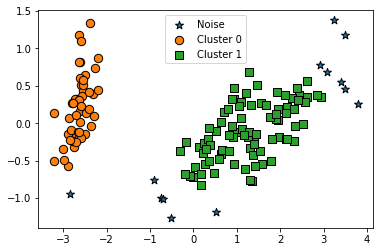

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0) # pca를 통해 2차원으로 시각화
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

-> 군집 2개와 이상치인 별 데이터 확인

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


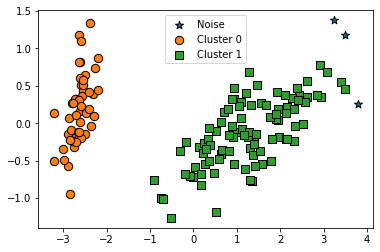

In [10]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean') # eps 0.6 -> 0.8

dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

반경을 키웠더니 이상치가 줄어듦

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


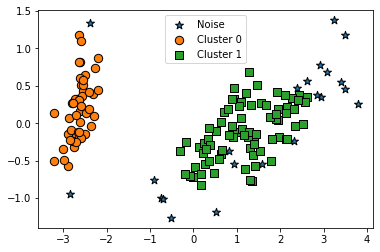

In [11]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean') # min_samples 8->16

dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

군집을 형성하기 위한 최소 데이터수가 많아짐 -> 높은 밀도의 군집만이 형성

=> 이상치 데이터 증가